In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('human_vital_signs_dataset_2024.csv')
df.head(1)

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk


In [3]:
display(df.isnull().sum())
df.duplicated().sum()

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64

np.int64(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Respiratory Rate          200020 non-null  int64  
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  object 
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [5]:
df.drop(['Patient ID', 'Timestamp'], axis=1, inplace=True)

In [6]:
order = [['Low Risk', 'High Risk']]
le = LabelEncoder()
oe = OrdinalEncoder(categories=order)
df['Gender'] = le.fit_transform(df['Gender'])
df[['Risk Category']] = oe.fit_transform(df[['Risk Category']])

In [7]:
df['Risk Category'] = df['Risk Category'].astype(int)

In [8]:
df.describe()

,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,79.533747,15.489451,36.748353,97.504372,124.437971,79.499625,53.446275,0.499465,74.996419,1.750031,0.099970,44.938346,25.003625,94.479074,0.525522
std,11.552894,2.294472,0.433290,1.442598,8.656946,5.757248,20.786802,0.500001,14.471502,0.144554,0.028861,10.404945,6.447143,4.797891,0.499349
min,60.000000,12.000000,36.000004,95.000007,110.000000,70.000000,18.000000,0.000000,50.000156,1.500001,0.050000,21.000000,12.505974,83.333333,0.000000
25%,70.000000,13.000000,36.372613,96.256859,117.000000,75.000000,35.000000,0.000000,62.423615,1.624777,0.074955,37.000000,20.134367,91.000000,0.000000
50%,80.000000,15.000000,36.747741,97.509629,124.000000,79.000000,53.000000,0.000000,74.977169,1.750478,0.099988,45.000000,24.320776,94.333333,1.000000
75%,90.000000,17.000000,37.123003,98.755722,132.000000,84.000000,71.000000,1.000000,87.539510,1.875310,0.124917,53.000000,29.187169,98.000000,1.000000
max,99.000000,19.000000,37.499992,99.999963,139.000000,89.000000,89.000000,1.000000,99.999765,1.999997,0.149999,69.000000,44.376487,105.666667,1.000000


In [9]:
'''
col = df.columns
for i in range(len(col)):
    sns.boxplot(df[col[i]])
    plt.show()
'''

'\ncol = df.columns\nfor i in range(len(col)):\n    sns.boxplot(df[col[i]])\n    plt.show()\n'

In [10]:
df.skew()

Heart Rate                 -0.001974
Respiratory Rate            0.004328
Body Temperature            0.002811
Oxygen Saturation          -0.003681
Systolic Blood Pressure     0.007265
Diastolic Blood Pressure    0.002329
Age                         0.004482
Gender                      0.002140
Weight (kg)                 0.000918
Height (m)                 -0.002239
Derived_HRV                 0.001034
Derived_Pulse_Pressure      0.005500
Derived_BMI                 0.459627
Derived_MAP                 0.001141
Risk Category              -0.102224
dtype: float64

In [11]:
X = df.drop(['Risk Category'], axis=1)
y = df['Risk Category']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160016, 14) (40004, 14) (160016,) (40004,)


In [14]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# Make predictions
y_pred = lr.predict(X_test_scaled)

In [17]:
# Evaluate the model
# MAE, MSE, RMSE, R2, adj R2
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')

mae: 0.18268173182681732
mse: 0.18268173182681732
rmse: 0.4274128353557218
r2: 0.26763141419317515


In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8173182681731826

In [19]:
data = pd.DataFrame(y_test)
data['Pred Risk'] = y_pred
print('Percentages of null values')
print(data.isnull().sum()/len(data)*100)
print('Percentages of true predicted values')
print(len(data[data['Risk Category'] == data['Pred Risk']])/len(data)*100)

Percentages of null values
Risk Category    0.0
Pred Risk        0.0
dtype: float64
Percentages of true predicted values
81.73182681731826


Naive_Baye's Gaussian Model

In [20]:
gau = GaussianNB()

gau.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [21]:
y_pred_gau = gau.predict(X_test)

In [22]:
accuracy_gau = accuracy_score(y_test, y_pred_gau)
accuracy_gau

0.9041845815418458

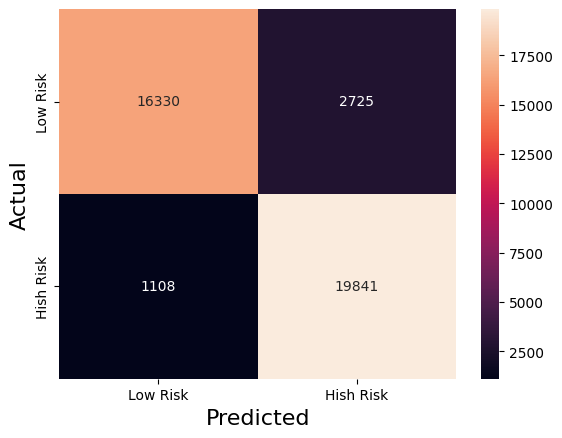

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_gau), annot=True, fmt='d', 
            xticklabels=['Low Risk','Hish Risk'], yticklabels=['Low Risk','Hish Risk'])
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.show()

In [24]:
report_gau = classification_report(y_test, y_pred_gau, output_dict=True)
display(pd.DataFrame(report_gau))

,0,1,accuracy,macro avg,weighted avg
precision,0.936461,0.879243,0.904185,0.907852,0.906497
recall,0.856993,0.947110,0.904185,0.902051,0.904185
f1-score,0.894966,0.911915,0.904185,0.903441,0.903842
support,19055.000000,20949.000000,0.904185,40004.000000,40004.000000


In [25]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(gau, X, y, cv = k_folds)

In [26]:
scores

array([0.90450955, 0.90520948, 0.90483452, 0.9029847 , 0.90385961])

In [27]:
# %% [markdown]
# #### Import Modules

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, 
                              GradientBoostingClassifier, RandomForestRegressor, 
                              ExtraTreesRegressor, HistGradientBoostingRegressor)
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                             r2_score, mean_absolute_error, mean_squared_error)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import math

# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    #"Support Vector Classifier": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "F1 Score": round(f1, 4),
        "Confusion Matrix": conf_matrix
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison:")
print(results_df.to_string(index=False))


Training Random Forest...

Training Extra Trees...

Training XGBoost...

Training Logistic Regression...


C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training K-Nearest Neighbors...

Training Gradient Boosting...

Training CatBoost...

Model Comparison:
              Model  Accuracy  F1 Score               Confusion Matrix
      Random Forest    1.0000    1.0000       [[19055, 0], [0, 20949]]
  Gradient Boosting    1.0000    1.0000       [[19055, 0], [0, 20949]]
           CatBoost    0.9988    0.9989      [[19049, 6], [41, 20908]]
            XGBoost    0.9986    0.9987     [[19035, 20], [35, 20914]]
        Extra Trees    0.9964    0.9966     [[18985, 70], [74, 20875]]
K-Nearest Neighbors    0.9209    0.9238 [[17641, 1414], [1752, 19197]]
Logistic Regression    0.6718    0.6927 [[12074, 6981], [6150, 14799]]


In [28]:
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                             r2_score, mean_absolute_error, mean_squared_error, 
                             precision_score, recall_score)  # Ensure these are included
results = []


for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    
    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4),
        "Confusion Matrix": conf_matrix.tolist()  # Convert to list for better display
    })

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("Evaluation of Tuned Models on Validation Set:")
print(results_df.to_string(index=False))

NameError: name 'best_estimators' is not defined

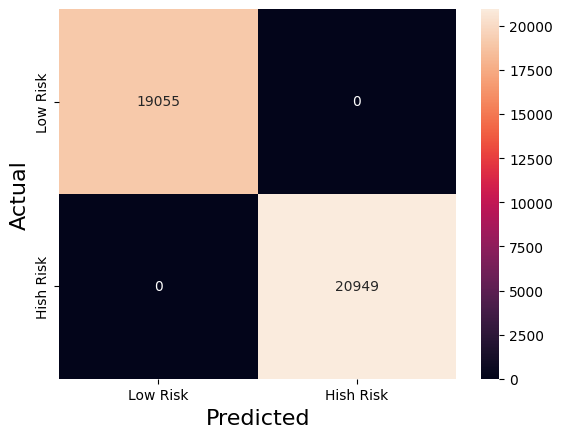

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Low Risk','Hish Risk'], yticklabels=['Low Risk','Hish Risk'])
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.show()